한글

In [1]:
from matplotlib import rc, font_manager as fm

# 나눔고딕 폰트 경로 설정
font_path = '../나눔고딕/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()

# 폰트 설정
rc('font', family=font_name)

반출 데이터 불러오기~ ~ ~

In [18]:
import pandas as pd
import geopandas as gpd

df1 = pd.read_csv('data/반출용/FINAL_TEMP.csv')


In [19]:
df1.head(2)

,RN,geometry,대형마트_개수,편의점_개수,지하철역_개수,은행_개수,문화시설_개수,공공기관_개수,카페_개수,병원_개수,약국_개수,헬스클럽_개수,셀프빨래방_개수,집객시설_총_개수,상주인구_수,도로_폭,도로_길이,집랭크,상랭크,가점수
0,강서로17길,POINT (126.845671 37.533482),0,7,1,5,0,0,15,15,6,9,0,58,14354,11,780,11,12,23
1,곰달래로19나길,POINT (126.844676 37.530839),1,6,0,2,0,1,15,15,2,6,2,50,15012,5,264,16,10,26


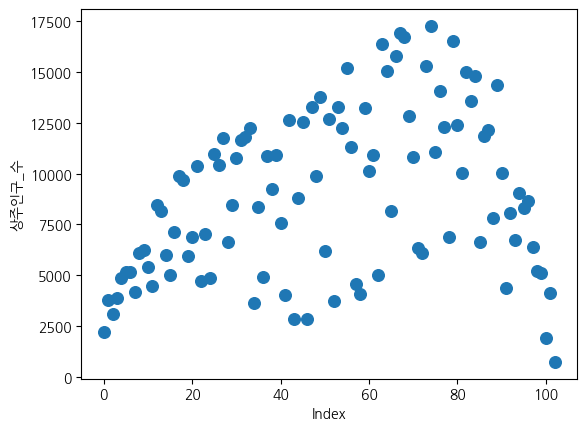

In [5]:
import matplotlib.pyplot as plt

# 버블 차트 그리기
index = list(range(103))

plt.scatter(index,df1['상주인구_수'],  s=70)  # s는 각 데이터 포인트의 크기를 조절합니다.



# x, y 축 레이블 설정
plt.xlabel('Index')
plt.ylabel('상주인구_수')

# 그래프 보이기
plt.show()

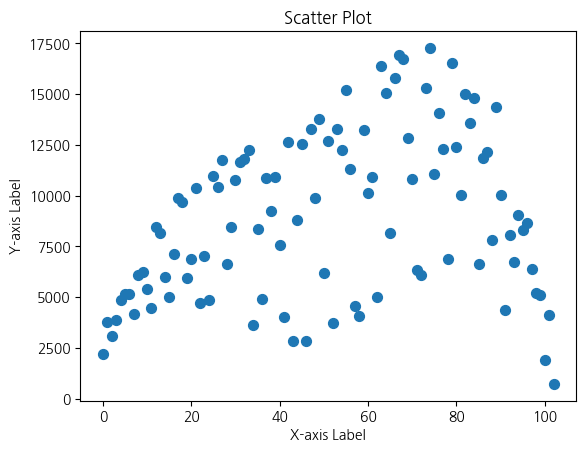

In [6]:
# Figure와 Axes 생성
fig, ax = plt.subplots()

X = list(range(103))

# 산점도 그리기 (크기 조절)
ax.scatter(X, df1['상주인구_수'], s=50)

# 그래프 제목과 라벨 설정
ax.set_title('Scatter Plot')
ax.set_xlabel('X-axis Label')
ax.set_ylabel('Y-axis Label')

# 그래프 표시
plt.show()

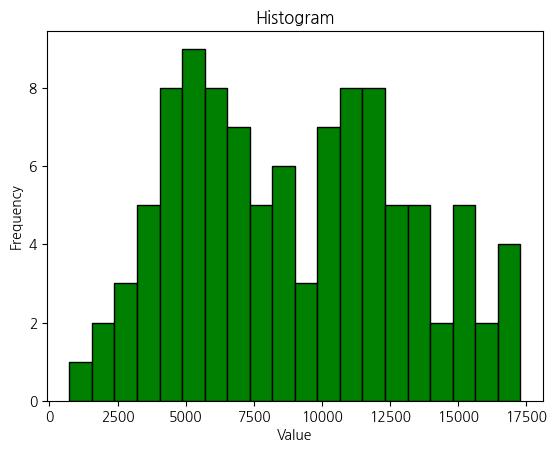

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


# 데이터프레임의 'Value' 열을 히스토그램으로 그리기
plt.hist(df1['상주인구_수'], bins=20, color='green', edgecolor='black')

# 그래프 제목과 레이블 설정
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 그래프 표시
plt.show()


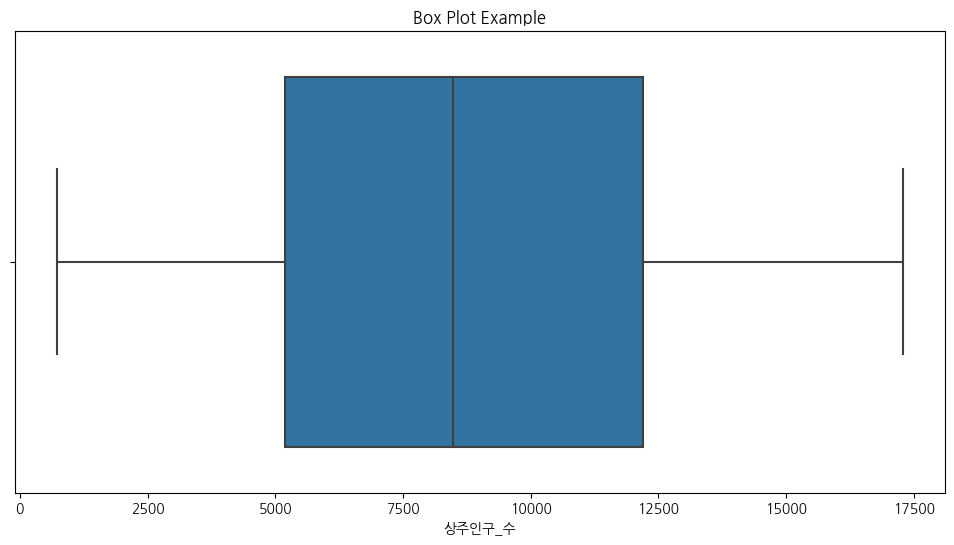

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# Box plot 그리기
sns.boxplot(x=df1['상주인구_수'])

# 그래프 제목 설정
plt.title('Box Plot Example')

# 그래프 표시
plt.show()

In [9]:
# 후보 좌표들 시각화 해보기

In [10]:
import folium

# 중심 위치를 설정합니다.
center = [37.533482, 126.845671]

# 지도 객체를 생성합니다.
m = folium.Map(location=center, zoom_start=15)

# 마커를 추가합니다.
marker_coords = [(37.533482, 126.845671), (37.530839, 126.844676), (37.530496, 126.845433), 
                 (37.531206, 126.845366), (37.532232, 126.843961), (37.529935, 126.843529), (37.529755, 126.84081)]

colors = ['red', 'orange', 'beige', 'green', 'blue', 'darkblue', 'purple']

for i, coord in enumerate(marker_coords):
    folium.Marker(location=coord, icon=folium.Icon(color=colors[i])).add_to(m)

# 지도를 HTML 파일로 저장하거나 화면에 출력합니다.
m.save('map.html')  # 현재 디렉토리에 'map.html' 파일로 저장
m


In [11]:
import folium

# 중심 위치를 설정합니다.
center = [37.533482, 126.845671]

# 지도 객체를 생성합니다.
m = folium.Map(location=center, zoom_start=15)

# 마커를 추가합니다.
marker_coords = [(37.530017, 126.844871), (37.532701, 126.844053), (37.529244, 126.843398), 
                 (37.533759, 126.838498), (37.53057, 126.846649), (37.529866, 126.842125), (37.52957, 126.846523)]

for i, coord in enumerate(marker_coords):
    folium.CircleMarker(
        location=coord,
        radius=10,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f'Marker {i+1}',
    ).add_to(m)

# 지도를 HTML 파일로 저장하거나 화면에 출력합니다.
m.save('map.html')  # 현재 디렉토리에 'map.html' 파일로 저장
m


In [12]:
import folium
import pandas as pd

from shapely.wkt import loads

# 데이터프레임의 'geometry' 열에서 좌표값 추출
df1['longitude'] = df1['geometry'].apply(lambda x: loads(x).x)
df1['latitude'] = df1['geometry'].apply(lambda x: loads(x).y)



# Folium 지도 객체 생성
m = folium.Map(location=[37.533482, 126.845671], zoom_start=16)  # 초기 지도 위치와 확대 정도 설정

# 데이터 프레임의 geometry 열에 있는 점들을 지도에 추가
for idx, row in df1.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f'Index: {idx}',
        icon=folium.Icon(color='blue')
    ).add_to(m)

# 지도를 HTML 파일로 저장하거나, Jupyter Notebook에서 바로 표시할 수 있습니다.
m.save('map.html')
m


In [13]:
# 500 미터를 기준으로 랭크 순으로 반경 내에 있으면 제거

In [15]:
from folium import Marker

# Folium 지도 객체 생성
m = folium.Map(location=[37.53, 126.84], zoom_start=15)  # 초기 지도 중심 및 확대 수준 설정

# 데이터를 지도에 추가
for geom in df1['geometry']:
    coords = [float(coord) for coord in geom.strip('POINT ()').split()]
    marker = Marker(location=[coords[1], coords[0]])  # 위도와 경도를 역으로 넣음
    marker.add_to(m)


# 지도를 출력
m

In [21]:
df1 = df1[['geometry', '집객시설_총_개수', '상주인구_수', '가점수']].sort_values(by = '가점수', ascending = True)
df1['Longitude'] = df1['geometry'].str.extract(r'POINT \((\d+\.\d+) (\d+\.\d+)\)')[0].astype(float)
df1['Latitude'] = df1['geometry'].str.extract(r'POINT \((\d+\.\d+) (\d+\.\d+)\)')[1].astype(float)
df1.head(3)

,geometry,집객시설_총_개수,상주인구_수,가점수,Longitude,Latitude
0,POINT (126.845671 37.533482),58,14354,23,126.845671,37.533482
1,POINT (126.844676 37.530839),50,15012,26,126.844676,37.530839
2,POINT (126.845433 37.530496),62,12166,36,126.845433,37.530496


In [ ]:
# 500미터 제거

In [29]:
!pip install geopy


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
from geopy.distance import geodesic

result_points = []  # 최종 결과로 남길 점들을 담을 리스트

while not df1.empty:
    # 인덱스 0번 점을 리스트에 추가
    result_points.append(df1.iloc[0]['geometry'])
    
    # 인덱스 0번 점으로부터 500미터 이내의 점을 제거
    reference_point = df1.iloc[0]['geometry']
    df1 = df1[df1.apply(lambda row: geodesic((df1.iloc[0]['Longitude'], df1.iloc[0]['Latitude']), (row['Longitude'], row['Latitude'])).meters > 500, axis=1)]

    # 데이터프레임이 비어있지 않은 경우, 인덱스를 다음으로 업데이트
    if not df1.empty:
        df1 = df1.reset_index(drop=True)

# 최종 결과 데이터프레임 생성
result_df = pd.DataFrame({'geometry': result_points})
result_df

,geometry


In [ ]:
# 300 몇 개 원본 = 좌표변환이 이상하네...

In [ ]:
import geopandas as gpd

# shp 파일 경로 지정
shp_path = 'data/final_points(raw/POINTS.shp'

# shp 파일 읽어오기
gdf = gpd.read_file(shp_path)
gdf.head(3)